# Link Analysis on Bitcoin OTC trust weighted signed network

In [42]:
import pandas as pd
from matplotlib import pyplot as plt


# saving the dataset as a dataframe
data = pd.read_csv("soc-sign-bitcoinotc.csv", names=['SOURCE','TARGET','RATING','TIME'])
data

,SOURCE,TARGET,RATING,TIME
0,6,2,4,1.289242e+09
1,6,5,2,1.289242e+09
2,1,15,1,1.289243e+09
3,4,3,7,1.289245e+09
4,13,16,8,1.289254e+09
...,...,...,...,...
35587,4499,1810,1,1.453612e+09
35588,2731,3901,5,1.453679e+09
35589,2731,4897,5,1.453679e+09
35590,13,1128,1,1.453680e+09


In [10]:
nodes = sorted(list(set(list(data.SOURCE.unique()) + list(data.TARGET.unique()))))
print(nodes)    # printing the node values present in the network

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 16, 17, 19, 20, 21, 23, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 39, 41, 44, 45, 46, 47, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 64, 65, 66, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 83, 86, 87, 88, 89, 93, 94, 95, 96, 97, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 119, 120, 122, 125, 127, 129, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 

In [31]:
n = len(nodes)
print("Total count of nodes in the network : ", n)
print("Total count of edges in the network : ", len(data))

Total count of nodes in the network :  5881
Total count of edges in the network :  35592


In [33]:
print("Maximum number annotated to a node : ",max(nodes))
print("Maximum weight annotated to an edge : ",max(data['RATING']))
print("Minimum weight annotated to an edge : ",min(data['RATING']))

Maximum number annotated to a node :  6005
Maximum weight annotated to an edge :  10
Minimum weight annotated to an edge :  -10


In [15]:
# making the adjacency list and edge list representations of the network

adj_matrix = [[-99 for i in range(6005)] for j in range(6005)]    # assuming that if no edge exists b/w two nodes then their value is -99
edge_list = {k:[] for k in nodes}
for i in range(len(data)):
    n1 = data['SOURCE'][i]
    n2 = data['TARGET'][i]
    adj_matrix[n1-1][n2-1] = data['RATING'][i]
    edge_list[n1].append(n2)

In [27]:
print("---------------------------The network as Adjacency list representation ---------------------")
for i in range(0,50):
    print(adj_matrix[i])

---------------------------The network as Adjacency list representation ---------------------
[-99, 8, 6, 10, 4, 8, 9, 7, 2, 7, -99, -99, 3, -99, 1, -99, 9, -99, 6, 2, 6, -99, 6, -99, -99, -99, -99, -99, 4, -99, 2, 1, 7, 1, 4, 3, -99, -99, 8, -99, 8, -99, -99, -99, -99, -99, 3, -99, -99, -99, 1, -99, -99, 1, -99, 2, 6, -99, -99, 8, 5, -5, -99, 3, -99, -99, -99, 2, -99, -99, 1, -99, -99, 1, -99, 2, -99, 1, -99, 2, 1, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, 1, -99, -99, 1, -99, -99, -99, -99, 1, 1, 2, -99, -99, 2, 1, -99, -99, -99, 1, 3, -99, -99, -99, -99, 2, -99, -99, -99, -99, -99, -99, 1, -99, 3, 4, -99, -99, 1, 2, -99, 1, -99, 5, 5, 1, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, 2, -99, -99, -99, -99, -99, 1, -99, -99, -99, -99, -99, 2, -99, -99, -99, -99, -99, -99, 7, -99, 1, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, 3, -99, -99, -99, -99, 8, -99, -99, -99, -99, 1, -99, -99, -99, -99, -99, -99,

In [28]:
print("---------------------------The network as Edge list representation ---------------------")
edge_list

---------------------------The network as Edge list representation ---------------------


{1: [15,
  5,
  32,
  34,
  17,
  31,
  13,
  20,
  54,
  56,
  71,
  74,
  78,
  68,
  81,
  101,
  119,
  2,
  76,
  23,
  138,
  110,
  145,
  114,
  111,
  7,
  165,
  19,
  223,
  225,
  132,
  227,
  104,
  64,
  245,
  247,
  234,
  251,
  260,
  261,
  109,
  271,
  274,
  141,
  296,
  180,
  311,
  312,
  139,
  324,
  356,
  51,
  384,
  399,
  438,
  442,
  144,
  219,
  47,
  320,
  464,
  431,
  486,
  416,
  505,
  421,
  80,
  29,
  511,
  494,
  534,
  537,
  563,
  567,
  569,
  215,
  579,
  61,
  266,
  21,
  630,
  677,
  695,
  672,
  773,
  647,
  396,
  353,
  9,
  779,
  545,
  1134,
  3,
  8,
  197,
  60,
  41,
  39,
  33,
  6,
  10,
  270,
  539,
  522,
  882,
  861,
  1369,
  1010,
  309,
  1447,
  1541,
  1557,
  1386,
  134,
  350,
  1353,
  178,
  592,
  57,
  1555,
  36,
  1727,
  1352,
  1487,
  120,
  1749,
  1693,
  1245,
  1281,
  304,
  1802,
  823,
  540,
  1714,
  1316,
  1860,
  1053,
  1753,
  1201,
  1366,
  1944,
  1363,
  1921,
  1701,
  1317

In [39]:
indegree_dict = {k:0 for k in edge_list.keys()}
for vertices in edge_list.values():
  for v in vertices:
    indegree_dict[v] += 1
print(indegree_dict)    # this dictionary stores the node value and its corresponding indegree

{1: 226, 2: 41, 3: 21, 4: 54, 5: 3, 6: 44, 7: 216, 8: 3, 9: 1, 10: 5, 13: 191, 15: 13, 16: 1, 17: 19, 19: 10, 20: 10, 21: 26, 23: 26, 25: 113, 26: 11, 28: 11, 29: 35, 31: 2, 32: 6, 33: 32, 34: 3, 35: 535, 36: 33, 37: 12, 39: 25, 41: 95, 44: 3, 45: 11, 46: 1, 47: 2, 51: 29, 52: 1, 53: 2, 54: 7, 55: 1, 56: 6, 57: 80, 60: 66, 61: 9, 62: 52, 64: 69, 65: 1, 66: 1, 68: 5, 69: 9, 70: 6, 71: 1, 72: 11, 74: 1, 75: 10, 76: 3, 77: 14, 78: 10, 79: 1, 80: 17, 81: 9, 83: 1, 86: 1, 87: 2, 88: 6, 89: 2, 93: 13, 94: 1, 95: 6, 96: 37, 97: 4, 99: 1, 100: 8, 101: 7, 103: 1, 104: 54, 105: 2, 106: 1, 107: 2, 108: 6, 109: 6, 110: 15, 111: 6, 112: 14, 113: 36, 114: 9, 115: 24, 116: 1, 119: 3, 120: 6, 122: 1, 125: 8, 127: 3, 129: 6, 131: 1, 132: 32, 133: 2, 134: 12, 135: 93, 137: 2, 138: 2, 139: 3, 140: 1, 141: 21, 142: 11, 143: 20, 144: 41, 145: 1, 146: 15, 147: 3, 148: 5, 149: 28, 150: 3, 152: 10, 153: 6, 154: 1, 155: 2, 156: 7, 157: 2, 158: 3, 159: 24, 160: 7, 161: 3, 162: 2, 163: 8, 164: 4, 165: 2, 166: 13

In [35]:
outdegree_dict = {k:len(v) for k,v in edge_list.items()}
print(outdegree_dict)    # this dictionary stores the node value and its corresponding outdegree

{1: 215, 2: 45, 3: 0, 4: 63, 5: 3, 6: 40, 7: 232, 8: 1, 9: 1, 10: 8, 13: 210, 15: 15, 16: 0, 17: 26, 19: 12, 20: 0, 21: 22, 23: 18, 25: 0, 26: 12, 28: 7, 29: 33, 31: 2, 32: 6, 33: 32, 34: 3, 35: 763, 36: 35, 37: 13, 39: 25, 41: 100, 44: 2, 45: 11, 46: 1, 47: 2, 51: 30, 52: 1, 53: 2, 54: 7, 55: 1, 56: 7, 57: 59, 60: 63, 61: 5, 62: 14, 64: 78, 65: 1, 66: 1, 68: 5, 69: 7, 70: 6, 71: 1, 72: 11, 74: 1, 75: 7, 76: 3, 77: 21, 78: 8, 79: 1, 80: 17, 81: 6, 83: 1, 86: 1, 87: 2, 88: 7, 89: 2, 93: 12, 94: 1, 95: 6, 96: 42, 97: 4, 99: 1, 100: 12, 101: 5, 103: 0, 104: 56, 105: 1, 106: 1, 107: 2, 108: 4, 109: 5, 110: 12, 111: 5, 112: 26, 113: 42, 114: 6, 115: 32, 116: 1, 119: 3, 120: 5, 122: 2, 125: 8, 127: 2, 129: 2, 131: 0, 132: 32, 133: 2, 134: 11, 135: 92, 137: 2, 138: 2, 139: 4, 140: 1, 141: 21, 142: 11, 143: 22, 144: 43, 145: 1, 146: 15, 147: 2, 148: 5, 149: 36, 150: 5, 152: 3, 153: 4, 154: 1, 155: 3, 156: 7, 157: 2, 158: 1, 159: 24, 160: 7, 161: 3, 162: 2, 163: 9, 164: 5, 165: 1, 166: 13, 167:

In [40]:
print("Maximum in-degree in this network : ", max(indegree_dict.values()))
print("Maximum out-degree in this network : ", max(outdegree_dict.values()))

Maximum in-degree in this network :  535
Maximum out-degree in this network :  763


In [30]:
d = len(data) / (n * (n-1))
print("Density of the network is : ", d)

Density of the network is :  0.0010292571373048454


In [41]:
indegs = sorted(list(set(indegree_dict.values())))
outdegs = sorted(list(set(outdegree_dict.values())))
print("-------------------All possible in-degrees in the network ------------------------")
print(indegs)
print("-------------------All possible out-degrees in the network ------------------------")
print(outdegs)

-------------------All possible in-degrees in the network ------------------------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 71, 72, 74, 79, 80, 81, 82, 83, 84, 85, 92, 93, 95, 96, 98, 99, 100, 103, 105, 110, 113, 115, 117, 118, 123, 128, 129, 132, 133, 134, 136, 144, 145, 158, 164, 165, 179, 180, 191, 203, 216, 222, 226, 264, 279, 311, 412, 535]
-------------------All possible out-degrees in the network ------------------------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 62, 63, 64, 65, 66, 67, 69, 70, 71, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 86, 89, 90, 92, 93, 94, 100, 104, 1

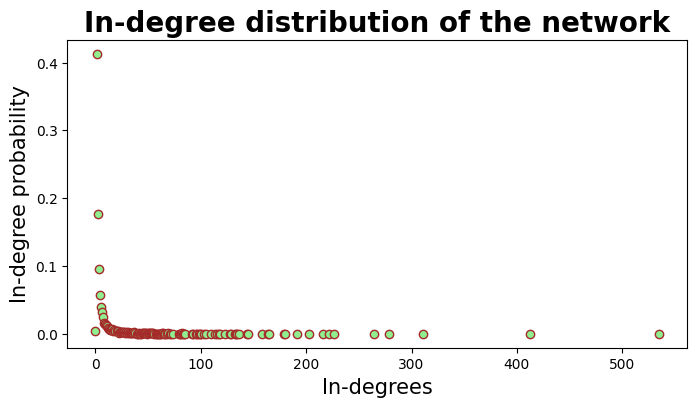

In [125]:
indeg_dist = {k:0 for k in indegs}
for i in indegree_dict.values():
  indeg_dist[i] += 1

indeg_dist = {k:round((v/n),3) for k,v in indeg_dist.items()}   # stores the indegree as key and probability of a node having that indegree as value

fig = plt.figure(figsize =(8, 4))
plt.scatter(indeg_dist.keys(), indeg_dist.values(), c='lightgreen', edgecolor ="brown")
plt.xlabel("In-degrees", fontsize=15)
plt.ylabel("In-degree probability", fontsize=15)
plt.title("In-degree distribution of the network", fontweight="bold", fontsize=20)
plt.show()

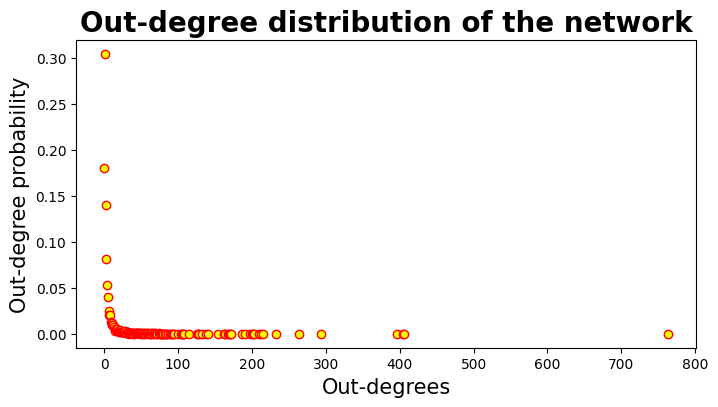

In [116]:
outdeg_dist = {k:0 for k in outdegs}
for i in outdegree_dict.values():
  outdeg_dist[i] += 1

outdeg_dist = {k:round((v/n),3) for k,v in outdeg_dist.items()}    # stores the outdegree as key and probability of a node having that outdegree as value

fig = plt.figure(figsize =(8, 4))
plt.scatter(outdeg_dist.keys(), outdeg_dist.values(), c='yellow', edgecolor ="red")
plt.xlabel("Out-degrees", fontsize=15)
plt.ylabel("Out-degree probability", fontsize=15)
plt.title("Out-degree distribution of the network", fontweight="bold", fontsize=20)
plt.show()

In [146]:
print("Maximum in-degree probability of a node in this network : ", max(indeg_dist.values()),"\n")
print("Average in-degree probability of a node in this network : ", round((sum(indeg_dist.values())/len(indegs)),3),"\n")
print("Mean in-degree probability of a node in this network : ", sorted(indeg_dist.values())[len(indegs)//2],"\n")
print("Minimum in-degree probability of a node in this network : ", min(indeg_dist.values()),"\n")
print("Maximum out-degree probability of a node in this network : ", max(outdeg_dist.values()),"\n")
print("Average out-degree probability of a node in this network : ", round((sum(outdeg_dist.values())/len(outdegs)),3),"\n")
print("Mean out-degree probability of a node in this network : ", sorted(outdeg_dist.values())[len(outdegs)//2],"\n")
print("Minimum out-degree probability of a node in this network : ", min(outdeg_dist.values()),"\n")

Maximum in-degree probability of a node in this network :  0.413 

Average in-degree probability of a node in this network :  0.009 

Mean in-degree probability of a node in this network :  0.0 

Minimum in-degree probability of a node in this network :  0.0 

Maximum out-degree probability of a node in this network :  0.305 

Average out-degree probability of a node in this network :  0.008 

Mean out-degree probability of a node in this network :  0.0 

Minimum out-degree probability of a node in this network :  0.0 



In [147]:
def make_possible_edges(edge_list):      # function which builds a set of all possible edges among a given a list of nodes
  edge_set = list()
  for src_id in range(len(edge_list)):
    for trg_id in range(len(edge_list)):
      if src_id != trg_id:
        src=edge_list[src_id]
        trg=edge_list[trg_id]
        edge=tuple([src,trg])
        edge_set.append(edge)
  return set(edge_set)


def get_lcc(G,graph_df):               # function to compute local clustering coefficient of every node
  edge_set=list()
  lcc_dict=dict()
  lcc_freq_dict=dict()
  for src,target in zip(graph_df['SOURCE'].values,graph_df['TARGET'].values):
    edge_set.append(tuple([src,target]))
  edge_set=set(edge_set)
  for nd in G.keys():
    neigh=G[nd]
    for nd2 in G.keys():
      if nd in G[nd2]:
        neigh.append(nd2)
    neighbours = list(set(neigh))
    poss_edges=make_possible_edges(neighbours)
    edges_neigh=edge_set.intersection(poss_edges)
    max_cnt=len(neighbours)*(len(neighbours)-1)
    if max_cnt:
      lcc=len(edges_neigh)/max_cnt 
      lcc = round(lcc,3)
      lcc_dict[nd]=lcc
      if lcc not in lcc_freq_dict:
        lcc_freq_dict[lcc] = 1
      else:
        lcc_freq_dict[lcc] += 1
  return lcc_dict, lcc_freq_dict


lcc_dict, lcc_freq_dist = get_lcc(edge_list,data)    # lcc_freq_dist is a dict consisting all possible lcc in this network as keys, and their frequency as values
print(lcc_dict)        # this dictionary contains node label as key and its lcc as value

{1: 0.042, 2: 0.091, 3: 0.14, 4: 0.087, 5: 1.0, 6: 0.112, 7: 0.024, 8: 1.0, 10: 0.375, 13: 0.038, 15: 0.074, 17: 0.106, 19: 0.129, 20: 0.3, 21: 0.089, 23: 0.068, 25: 0.056, 26: 0.038, 28: 0.109, 29: 0.067, 31: 1.0, 32: 0.267, 33: 0.217, 34: 1.0, 35: 0.003, 36: 0.05, 37: 0.045, 39: 0.115, 41: 0.058, 44: 0.333, 45: 0.038, 47: 1.0, 51: 0.096, 53: 0.0, 54: 0.405, 56: 0.548, 57: 0.143, 60: 0.038, 61: 0.227, 62: 0.079, 64: 0.043, 68: 0.6, 69: 0.069, 70: 0.233, 72: 0.106, 75: 0.182, 76: 1.0, 77: 0.111, 78: 0.289, 80: 0.097, 81: 0.153, 87: 0.0, 88: 0.107, 89: 1.0, 93: 0.058, 95: 0.143, 96: 0.096, 97: 0.0, 100: 0.265, 101: 0.042, 104: 0.063, 105: 1.0, 107: 0.0, 108: 0.3, 109: 0.262, 110: 0.286, 111: 0.3, 112: 0.058, 113: 0.07, 114: 0.181, 115: 0.122, 119: 0.083, 120: 0.381, 122: 1.0, 125: 0.333, 127: 0.333, 129: 0.233, 132: 0.106, 133: 0.0, 134: 0.199, 135: 0.065, 137: 1.0, 138: 1.0, 139: 0.417, 141: 0.091, 142: 0.218, 143: 0.112, 144: 0.063, 146: 0.062, 147: 0.333, 148: 0.1, 149: 0.097, 150: 0

In [148]:
print("Maximum LCC in this network : ",max(lcc_dict.values()),"\n")
print("Average LCC in this network : ",round(sum(lcc_dict.values())/n,3),"\n")
print("Mean LCC in this network : ",sorted(lcc_dict.values())[n//2],"\n")
print("Minimum LCC in this network : ",min(lcc_dict.values()),"\n")

Maximum LCC in this network :  1.0 

Average LCC in this network :  0.149 

Mean LCC in this network :  0.456 

Minimum LCC in this network :  0.0 



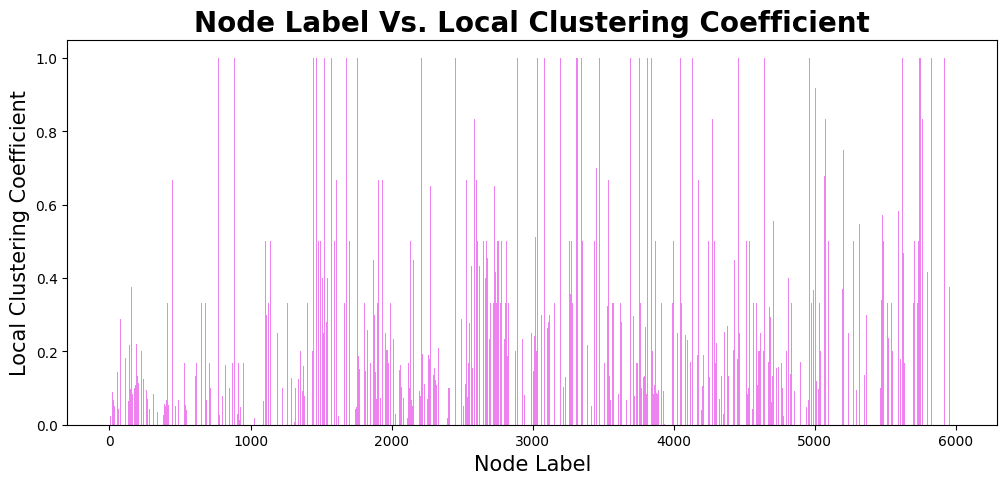

In [149]:
fig = plt.figure(figsize =(12,5))
plt.bar(lcc_dict.keys(), lcc_dict.values(), color ='violet', width=1.0)
plt.xlabel("Node Label", fontsize=15)
plt.ylabel("Local Clustering Coefficient", fontsize=15)
plt.title("Node Label Vs. Local Clustering Coefficient", fontweight="bold", fontsize=20)
plt.show()

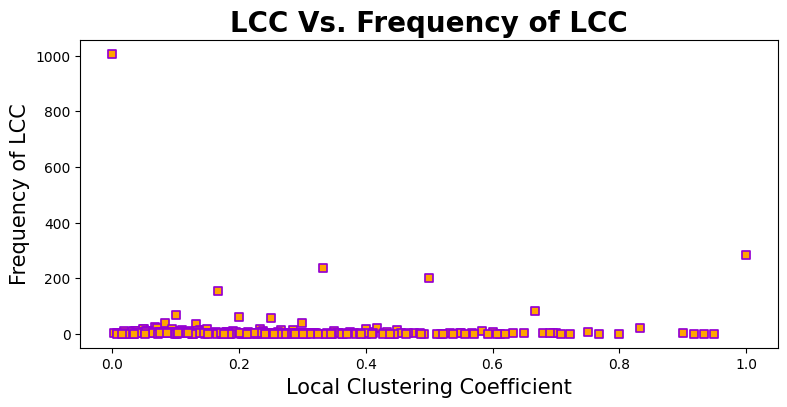

In [151]:
fig = plt.figure(figsize =(9,4))
plt.scatter(lcc_freq_dist.keys(), lcc_freq_dist.values(), c='orange', edgecolor ="darkviolet", marker='s',linewidth=1.25)
plt.xlabel("Local Clustering Coefficient", fontsize=15)
plt.ylabel("Frequency of LCC", fontsize=15)
plt.title("LCC Vs. Frequency of LCC", fontweight="bold", fontsize=20)
plt.show()